In [72]:
import torch as tc
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
"""with open("results/graphical_model.pkl", "wb") as f:
    graph = pickle.load(f)"""

proposal_samples = tc.load("./proposal_samples.pt").numpy() #latent topological order
proposal_weights = tc.load("./proposal_weights.pt").numpy()
proposal_weights /= proposal_weights.sum()
idx = np.random.choice(np.arange(len(proposal_weights)), size=len(proposal_weights), p=proposal_weights)
resamples = proposal_samples[idx]

df1 = pd.DataFrame(proposal_samples, columns = ["slope", "bias"]) #CHANGE : PUT TOPOLOGICAL ORDER INSTEAD
df1["sample_type"] = ["proposal"]*len(idx)
df1["color"] = ["orange"]*len(idx)
df2 = pd.DataFrame(resamples, columns = ["slope", "bias"])
df2["sample_type"] = ["posterior"]*len(idx)
df2["color"] = ["blue"]*len(idx)
df = pd.concat([df1, df2], axis=0)

In [74]:
df.columns

Index(['slope', 'bias', 'sample_type', 'color'], dtype='object')

In [68]:
def triangle_plot(df, mu=None, cov=None, **kwargs):
    n = len(df.columns) - 2 #-2 because 1 col for color, one for type
    #HERE
    plt.subplots(2, 2, **kwargs)
    plt.subplot(2, 2, 1)
    for name, samples in samples_dict.items():
        plt.hist(tc.stack([sample['bias'] for sample in samples]).numpy(), alpha=0.7, density=True, bins='auto', label=name)
    if mu is not None and cov is not None:
        x, f = get_distribution(plt, mu[0], np.sqrt(cov[0, 0]))
        plt.plot(x, f, color='black', label='analytical')
    plt.gca().set_xticklabels([])
    plt.yticks([])
    plt.legend()
    plt.subplot(2, 2, 4)
    for name, samples in samples_dict.items():
        plt.hist(tc.stack([sample['slope'] for sample in samples]).numpy(), alpha=0.7, density=True, bins='auto', label=name)
    if mu is not None and cov is not None:
        x, f = get_distribution(plt, mu[1], np.sqrt(cov[1, 1]))
        plt.plot(x, f, color='black', label='analytical')
    plt.xlabel('slope')
    plt.yticks([])
    plt.subplot(2, 2, 3)
    for name, samples in samples_dict.items():
        plt.scatter(tc.stack([sample['bias'] for sample in samples]), tc.stack([sample['slope'] for sample in samples]).numpy(), alpha=0.5, s=5., label=name)
    if mu is not None and cov is not None:
        X, Y, Z = get_contours(plt, mu, cov)
        plt.contour(X, Y, Z, colors='black', alpha=0.9, levels=3)
    plt.xlabel('bias')
    plt.ylabel('slope')
    plt.subplot(2, 2, 2).axis('off')
    plt.tight_layout()
    plt.show()

,slope,bias,sample_type,color
0,-11.058702,16.008377,proposal,orange
1,-4.063694,-7.298114,proposal,orange
2,-5.251868,16.015718,proposal,orange
3,2.582070,-25.631664,proposal,orange
4,4.798214,-1.478310,proposal,orange
...,...,...,...,...
995,0.800525,9.787694,posterior,blue
996,-6.462874,0.262826,posterior,blue
997,-9.093738,15.822288,posterior,blue
998,-13.220824,16.014620,posterior,blue


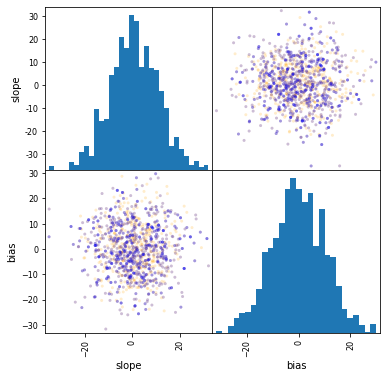

In [71]:
pd.plotting.scatter_matrix(df[["slope", "bias"]], color=df["color"] , alpha = 0.2, figsize = (6, 6), hist_kwds={'bins':"auto"});